In [1]:
import os
print(os.getcwd())

/content


In [2]:
!wget https://facesyntheticspubwedata.z6.web.core.windows.net/iccv-2021/dataset_1000.zip

--2025-11-05 08:34:08--  https://facesyntheticspubwedata.z6.web.core.windows.net/iccv-2021/dataset_1000.zip
Resolving facesyntheticspubwedata.z6.web.core.windows.net (facesyntheticspubwedata.z6.web.core.windows.net)... 57.150.110.4
Connecting to facesyntheticspubwedata.z6.web.core.windows.net (facesyntheticspubwedata.z6.web.core.windows.net)|57.150.110.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337604629 (322M) [application/octet-stream]
Saving to: ‘dataset_1000.zip’

dataset_1000.zip    100%[===================>] 321.96M  5.99MB/s    in 53s     

2025-11-05 08:35:02 (6.06 MB/s) - ‘dataset_1000.zip’ saved [337604629/337604629]



In [3]:
!unzip dataset_1000.zip

Archive:  dataset_1000.zip
 extracting: 000000.png              
 extracting: 000000_seg.png          
 extracting: 000000_ldmks.txt        
 extracting: 000001.png              
 extracting: 000001_seg.png          
 extracting: 000001_ldmks.txt        
 extracting: 000002.png              
 extracting: 000002_seg.png          
 extracting: 000002_ldmks.txt        
 extracting: 000003.png              
 extracting: 000003_seg.png          
 extracting: 000003_ldmks.txt        
 extracting: 000004.png              
 extracting: 000004_seg.png          
 extracting: 000004_ldmks.txt        
 extracting: 000005.png              
 extracting: 000005_seg.png          
 extracting: 000005_ldmks.txt        
 extracting: 000006.png              
 extracting: 000006_seg.png          
 extracting: 000006_ldmks.txt        
 extracting: 000007.png              
 extracting: 000007_seg.png          
 extracting: 000007_ldmks.txt        
 extracting: 000008.png              
 extracting: 000008_seg

In [4]:
!mkdir png
!mkdir ldmks
!mkdir seg

In [5]:
import os
fileslist = []

for path,_, files in os.walk(os.getcwd()):
  for file in files:
    fileslist.append(os.path.join(path, file))

print(fileslist[:5])

['/content/000277_ldmks.txt', '/content/000952_seg.png', '/content/000811_seg.png', '/content/000810.png', '/content/000861_ldmks.txt']


In [6]:
import shutil

for file in fileslist:
  if ".txt" in os.path.basename(file):
    shutil.move(file, "/content/ldmks/")

In [7]:
for file in fileslist:
  if "_seg.png" in os.path.basename(file):
    shutil.move(file, "/content/seg/")

In [10]:
for file in fileslist:
  if ".png" in os.path.basename(file):
    if "_seg.png" in os.path.basename(file):
      pass
    else:
      shutil.move(file, "/content/png/")

In [ ]:

def display(display_list):
  plt.figure(figsize=(15,15))
  title = ['Input', 'True', 'Predict']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [11]:
RAW_fileslist = []

for path,_, files in os.walk("/content/png/"):
  for file in files:
    RAW_fileslist.append(os.path.join(path, file))

In [12]:
SEG_fileslist = []

for path,_, files in os.walk("/content/seg/"):
  for file in files:
    SEG_fileslist.append(os.path.join(path, file))

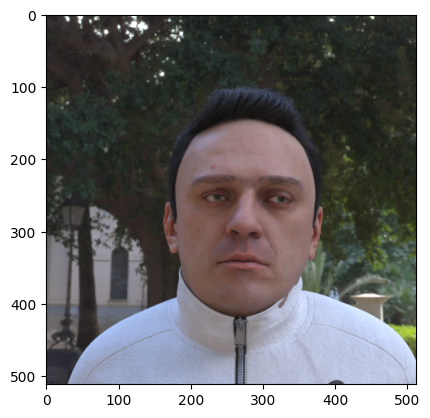

In [15]:
image = img.imread(RAW_fileslist[0])                       # 讀取圖片
plt.imshow(image)                                    # 在圖表中繪製圖片
plt.show()

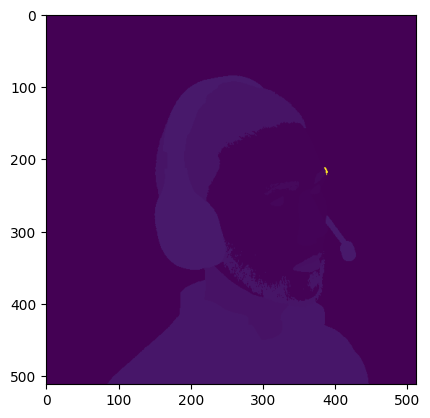

In [16]:
image = img.imread(SEG_fileslist[0])                       # 讀取圖片
plt.imshow(image)                                    # 在圖表中繪製圖片
plt.show()

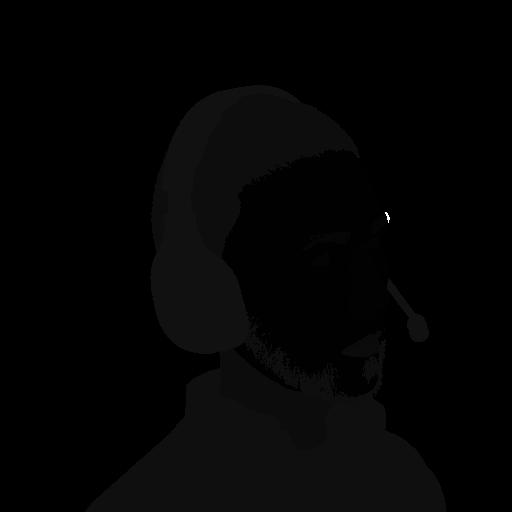

In [17]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(SEG_fileslist[0])
cv2_imshow(img)

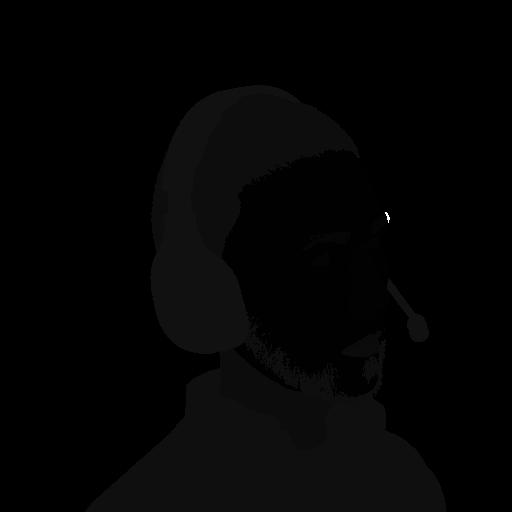

In [18]:
test = img.copy()
cv2_imshow(test)

In [19]:
test_demo=test[:,:,0]

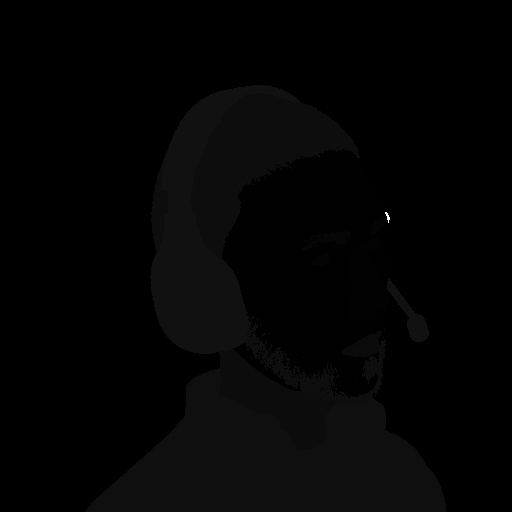

In [20]:
cv2_imshow(test_demo)

In [21]:
import numpy as np

- BACKGROUND = 0
- SKIN = 1
- NOSE = 2
- RIGHT_EYE = 3
- LEFT_EYE = 4
- RIGHT_BROW = 5
- LEFT_BROW = 6
- RIGHT_EAR = 7
- LEFT_EAR = 8
- **MOUTH_INTERIOR = 9**
- **TOP_LIP = 10**
- **BOTTOM_LIP = 11**
- NECK = 12
- HAIR = 13
- BEARD = 14
- CLOTHING = 15
- GLASSES = 16
- HEADWEAR = 17
- FACEWEAR = 18
- IGNORE = 255

In [22]:
color_seg = np.zeros((test_demo.shape[0], test_demo.shape[1], 3), dtype=np.uint8)

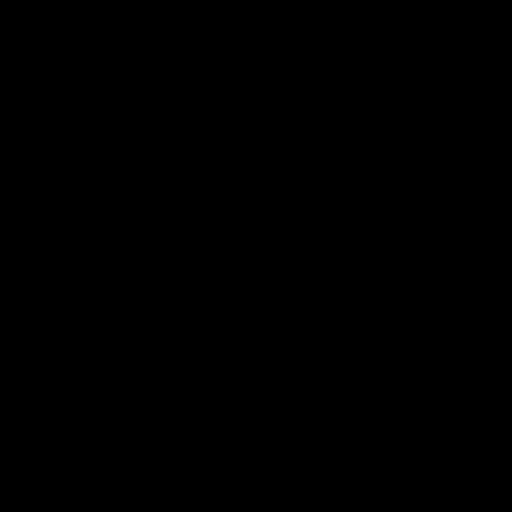

In [23]:
##MOUTH_INTERIOR
color_seg[test_demo == 9,:] = [160, 221, 255]
cv2_imshow(color_seg)

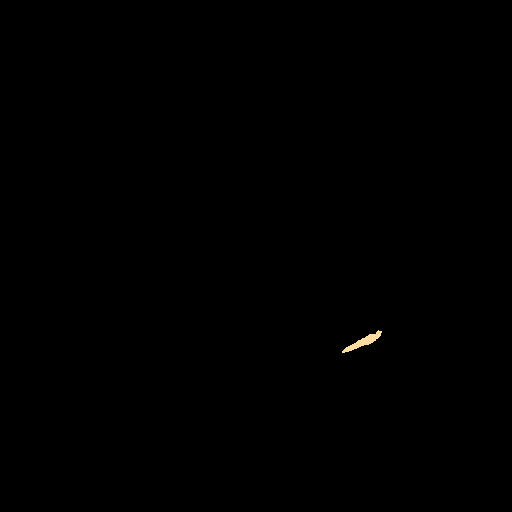

In [24]:
 ##TOP_LIP
 color_seg[test_demo == 10,:] = [160, 221, 255]
 cv2_imshow(color_seg)

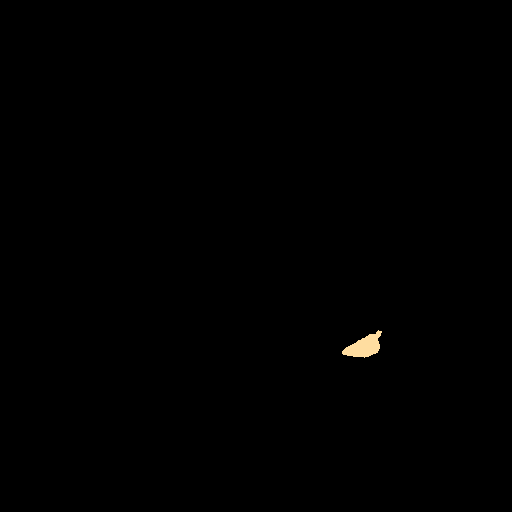

In [25]:
##BOTTOM_LIP
color_seg[test_demo == 11,:] = [160, 221, 255]
cv2_imshow(color_seg)